In [1]:
import jax
import jax.numpy as jnp
from queso.sensors import Sensor
from queso.estimators import BayesianDNNEstimator
from queso.sensors.tc.detection import local_r
from queso.sensors.tc.interaction import local_rz
from queso.sensors.tc.preparation import hardware_efficient_ansatz

Please first ``pip install -U qiskit`` to enable related functionality in translation module
Please first ``pip install -U cirq`` to enable related functionality in translation module
fail to load cloud provider module: tencent


## Hardware efficient ansatz

In [39]:
# the sensor with 2 qubits and 2 layers
sensor = Sensor(n=4, k=4, preparation="hardware_efficient_ansatz", interaction="local_rz", detection="local_r")

In [40]:
theta, phi, mu = sensor.init_params()
print("Initialized Parameters:")
print("Theta:", theta)
print("Phi:", phi)
print("Mu:", mu)

Initialized Parameters:
Theta: [[[0.67679355 0.82451428]
  [0.56137351 0.35046868]
  [0.24394855 0.24521445]
  [0.64638309 0.24994693]
  [0.25327892 0.9984534 ]]

 [[0.40260912 0.48348099]
  [0.83776909 0.40643124]
  [0.71720537 0.04884404]
  [0.10552987 0.11140281]
  [0.76147612 0.59669042]]

 [[0.60076185 0.52673765]
  [0.13285424 0.39639493]
  [0.92611093 0.53320779]
  [0.84562545 0.7498344 ]
  [0.63864232 0.85405436]]

 [[0.90222715 0.13060226]
  [0.49238151 0.90083976]
  [0.42685106 0.12322471]
  [0.25366788 0.92605068]
  [0.96635004 0.14733648]]]
Phi: 0.8121468230802726
Mu: [[0.93372714 0.77281432 0.98809763]
 [0.80755022 0.05073123 0.73874705]
 [0.94583762 0.16318357 0.68010461]
 [0.60671191 0.02660504 0.37534912]]



Quantum Circuit:


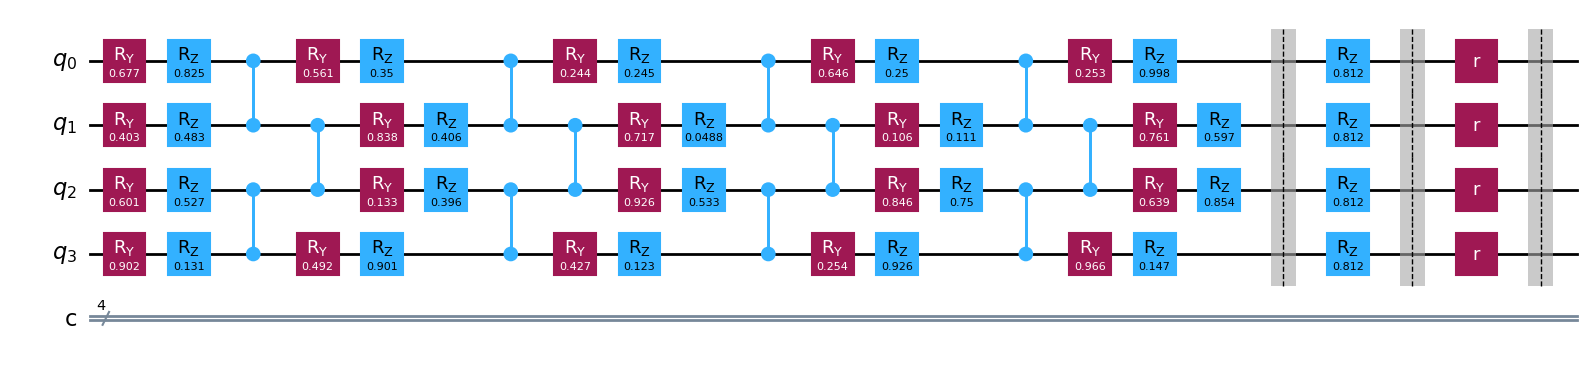

In [41]:
print("\nQuantum Circuit:")
display(sensor.circuit(theta, phi, mu).draw(**dict(output="mpl")))

In [42]:
# Simulate measurement outcomes with 100 shots
data = sensor.sample(theta, phi, mu, n_shots=1000).astype(int)
print("\nMeasurement Shots:")
print(data)


Measurement Shots:
[[0 0 0 0]
 [1 1 1 0]
 [0 1 0 0]
 ...
 [0 1 0 1]
 [1 0 0 0]
 [0 0 0 0]]


In [43]:

qfi_value = sensor.qfi(theta, phi)
cfi_value = sensor.cfi(theta, phi, mu)

print("QFI:", qfi_value)
print("CFI:", cfi_value)


QFI: 2.9965980633626716
CFI: 0.49906603844018715


In [57]:
estimator = BayesianDNNEstimator(nn_dims=[10, 10, 10])
params = estimator.init(jax.random.PRNGKey(0), data)
posterior = estimator.apply(params, data)
print(posterior)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.26293814 -0.3963852  -0.29948932 ... -0.28477395  0.22798355
  -0.15120164]
 [-0.26132157 -0.02031359 -0.0462846  ... -0.20568664 -0.07317381
  -0.0917477 ]
 ...
 [-0.2606345   0.12089366  0.01536478 ... -0.20563991 -0.20992154
  -0.1603106 ]
 [-0.18949866 -0.05282457 -0.33429015 ... -0.17742747  0.02949216
   0.15744941]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


In [54]:
posterior_mean = jnp.mean(posterior, axis=0)

# Define the range of possible phi values
phi_values = jnp.linspace(-jnp.pi, jnp.pi, posterior_mean.shape[0])

# argmax of the posterior
phi_hat = phi_values[jnp.argmax(posterior_mean)]
print(f"\nEstimated Phi: {phi_hat}")

bias = phi_hat - phi
print(f"Bias: {bias}")

variance = jnp.sum(posterior_mean * (phi_values - phi) ** 2)
print(f"Variance: {variance}")


Estimated Phi: 0.9561368945708066
Bias: 0.143990071490534
Variance: -3.5936664496274138


## Ansatz

Sensor with probe state preparation using a 'hardware_efficient_ansatz' ansatz.


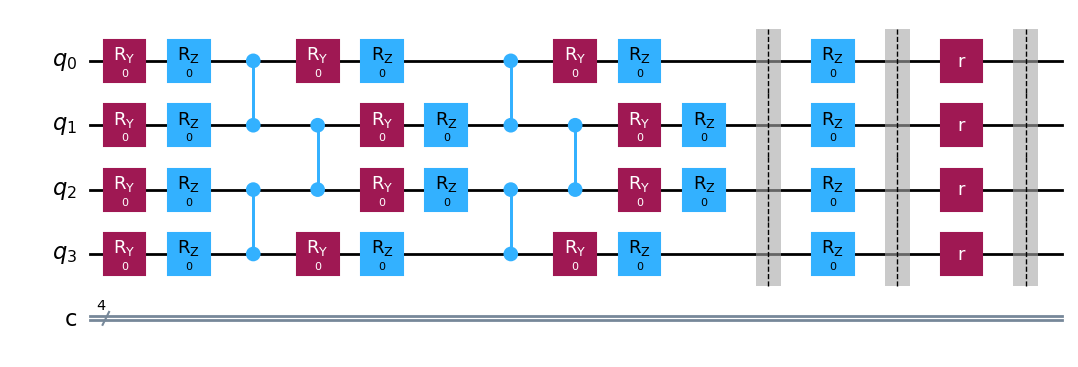

Sensor with probe state preparation using a 'trapped_ion_ansatz' ansatz.


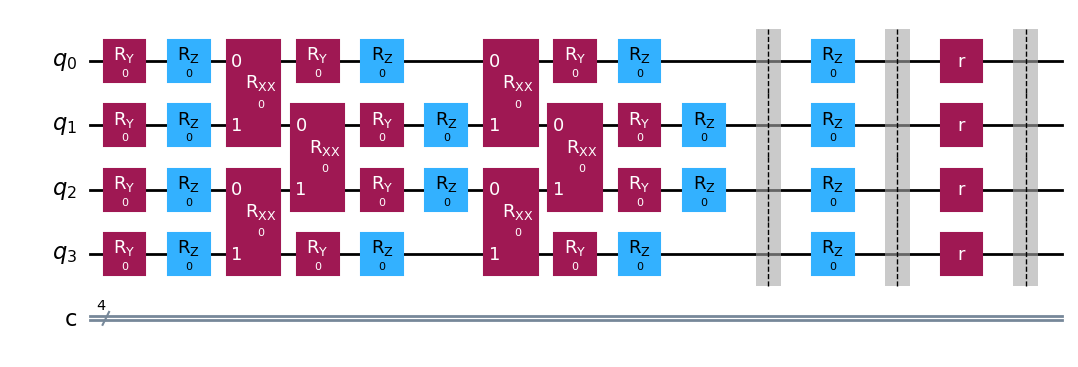

Sensor with probe state preparation using a 'photonic_graph_state_ansatz' ansatz.


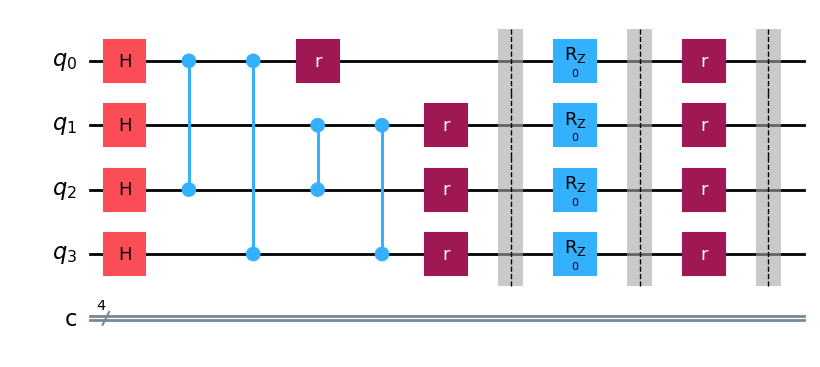

In [64]:
for preparation in (
    'hardware_efficient_ansatz',
    'trapped_ion_ansatz',
    'photonic_graph_state_ansatz',
):
    sensor = Sensor(
        n=4, 
        k=2,
        **dict(preparation=preparation)
    )
    print(f"Sensor with probe state preparation using a '{preparation}' ansatz.")
    display(sensor.circuit(sensor.theta, sensor.phi, sensor.mu).draw(**dict(output="mpl")))

Initialized Parameters:
Theta: [[[0.22263579 0.76069374]
  [0.56827526 0.15639338]]

 [[0.78850196 0.19682722]
  [0.39889747 0.32087723]]

 [[0.17564708 0.77932295]
  [0.71958431 0.84213708]]

 [[0.68532719 0.11594154]
  [0.73800177 0.33039537]]]
Phi: 0.7865233544021737
Mu: [[0.10785743 0.59579991 0.11863873]
 [0.61107874 0.1733683  0.48934994]
 [0.93084358 0.73440277 0.0988208 ]
 [0.02541192 0.47572995 0.27700099]]
Sensor with local_rz interaction between probe state and parameter φ.


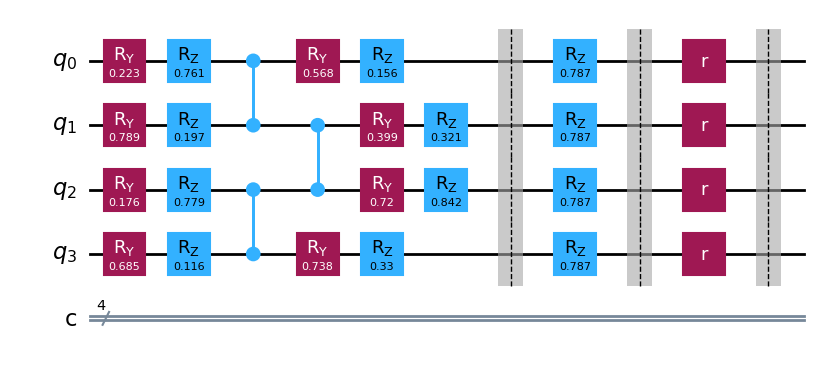

Initialized Parameters:
Theta: [[[0.58137326 0.69532921]
  [0.38031256 0.40990569]]

 [[0.17289734 0.2497406 ]
  [0.27530632 0.33664567]]

 [[0.2601036  0.03983986]
  [0.3871855  0.59928857]]

 [[0.27716604 0.83249367]
  [0.09412123 0.65916786]]]
Phi: 0.9084526755337174
Mu: [[0.70146689 0.94597612 0.36274146]
 [0.87008801 0.07315327 0.07459653]
 [0.65830025 0.38237865 0.04140552]
 [0.31530973 0.33425164 0.89705215]]
Sensor with local_rx interaction between probe state and parameter φ.


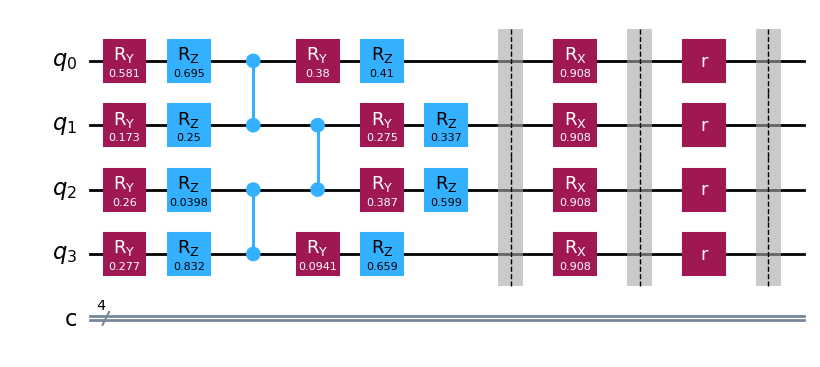

Initialized Parameters:
Theta: [[[0.16241857 0.89825223]
  [0.03994502 0.89450252]]

 [[0.85959642 0.02552073]
  [0.15144364 0.60860107]]

 [[0.4226857  0.51205335]
  [0.11657442 0.95000099]]

 [[0.60667966 0.11383777]
  [0.25629921 0.52708655]]]
Phi: 0.8705123870520084
Mu: [[0.46901924 0.60668213 0.72715236]
 [0.17854412 0.44346608 0.28110877]
 [0.18156905 0.33123002 0.10287892]
 [0.02001489 0.66859176 0.22226565]]
Sensor with single_rx interaction between probe state and parameter φ.


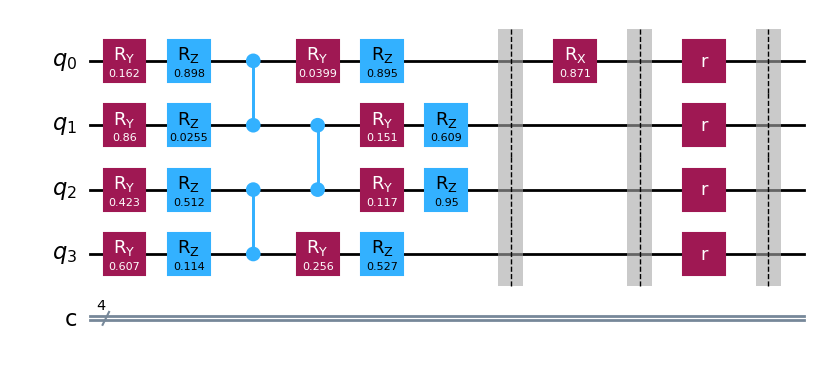

Initialized Parameters:
Theta: [[[0.13511425 0.51707263]
  [0.94082246 0.57365196]]

 [[0.04528328 0.01720344]
  [0.75376742 0.28469586]]

 [[0.13133308 0.63436252]
  [0.22327914 0.56192079]]

 [[0.49528604 0.22790929]
  [0.68988353 0.71091042]]]
Phi: 0.1901308246139526
Mu: [[0.6285397  0.75772429 0.89892673]
 [0.57588203 0.54807166 0.65690673]
 [0.26508405 0.91927858 0.93411179]
 [0.54771732 0.40592594 0.30897724]]
Sensor with fourier_rx interaction between probe state and parameter φ.


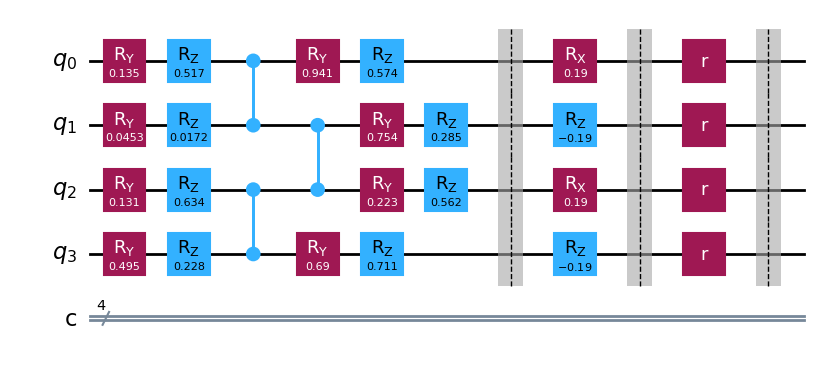

In [63]:
for interaction in (
    'local_rz',
    'local_rx',
    'single_rx',
    'fourier_rx',
):
    theta, phi, mu = sensor.init_params()
    print("Initialized Parameters:")
    print("Theta:", theta)
    print("Phi:", phi)
    print("Mu:", mu)
    sensor = Sensor(
        n=4, 
        k=1,
        **dict(interaction=interaction)
    )
    print(f"Sensor with {interaction} interaction between probe state and parameter φ.")
    display(sensor.circuit(theta, phi, mu).draw(**dict(output="mpl")))
    